# Data Science Essentials: Applied Optimization

Joaquim Gromicho, 2021

This notebook is part of the module Applied Optimization of the Analytics Academy's Data Science Essentials.

---
 > During this course we make use of Jupyter notebooks hosted by [Google Colab](https://colab.research.google.com/notebooks/intro.ipynb). 
  Notebooks deployed on `colab` require neither python nor other dependencies to be installed on your own machine, you only need a browser (preferably `chrome`) and you may also need a google account if you want to execute them. 
 
---

This training consists of a series of self-contained stories. 

This whole series makes use of [pyomo](https://en.wikipedia.org/wiki/Pyomo) which is the most complete and versatile Mathematical Optimization package in the python ecosystem.

The notebooks used in this course make extensive use of [markdown](https://en.wikipedia.org/wiki/Markdown) of which [here](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet) you may find a very comprehensive summary. May you like a document that you can print, fold, and take with you then you may like to check [this](https://enterprise.github.com/downloads/en/markdown-cheatsheet.pdf).

We also draw pictures on our notebooks. Therefore, we need the [magic](https://ipython.readthedocs.io/en/stable/interactive/magics.html) below. 




In [ ]:
%matplotlib inline

For this notebook we need the following packages:
 * sympy
 * math
 * matplotlib 
 * IPython
 * pyomo 
 * ipopt

If your python distribution is Anaconda, then from the above only the last two are likely not yet to be part of your local python installation.
You need to install those packages on the anaconda prompt. As usual, you should try first with `conda install` and if that does not work then with `pip install`.
You can try the conda distribution as explained in:
https://anaconda.org/conda-forge/pyomo
https://anaconda.org/conda-forge/ipopt 
For pyomo please read http://www.pyomo.org/installation and doe ipopt please refer to https://pypi.org/project/ipopt/ 



## About being pythonic

If you program, then reading [this](https://docs.python-guide.org/writing/style/) will help you writing code that feels _natural_ in python. You may also like to uncomment the following statement for some introspection 😉 

In [ ]:
# import this

## Dependencies

The `import` statement on the cell above is special... it imports programmer's wisdom!
The common usage is to acquire access to python packages.

In [ ]:
import sympy
import math


---

# Alice: a romantic introduction to Matematical Optimization and to Python

Note: this story was originally told in the book [Optimization](https://press.princeton.edu/books/hardcover/9780691102870/optimization) and the protagonist there is called Samantha, but we stick to the alphabetical order...

<img align='right' src='https://drive.google.com/uc?export=view&id=1ardcTimUNz-GFnzaiFlbDy6Ll0rxQl1d'>

As the story goes, Alice receives a beautiful rose.
She has nothing but a lemonade glass to hold the rose and becomes very distressed when the ensemble falls down. 

Adding a bit of water helps! Not only that helps the rose, but it also helps the stability: glass, with some water, and rose stands!

Alice thinks: if a bit of water helps, the let us fill the glass! 

However, it tilts and falls, as in the beginning, just much more wet. 

Alice has a problem to solve: what is the _optimal_ level of water for her rose on a lemonade glass?

She learns from [Archimedes]( https://en.wikipedia.org/wiki/Archimedes) how to compute the _center of gravity_ of the glass with water, which has height
$h = \frac{m_w}{m_w+m_g} h_w + \frac{m_g}{m_w+m_g} h_g$ with:

* $m_w$ the mass of water 
* $m_g$ the mass of glass
* $h_w$ the height of the center of gravity of the water in the glass
* $h_g$ the height of the center of gravity of the glass without water 

Since Alice's glass is $20$ cm tall, $4$ cm wide and weighs $100$ gram, Alice may fill the glass with water up to height $x$ cm, provided that $0 \leq x \leq 20$ since the water must fit in the glass.

The volume of water is $\pi r^2 x$ with $r$ the radius of the base, i.e. $r=2$. 
The volume is therefore $4\pi x$ cubic centimetres. 

Since the density of water can be [taken](https://en.wikipedia.org/wiki/Gram_per_cubic_centimetre) as being $1$ gram per cubic centimeter we have:

* $m_w = 4\pi x$
* $m_g = 100$
* $h_w = \frac{x}{2}$
* $h_g = \frac{20}{2} = 10$ 

And from here we finally obtain the following formula for the height of the center of gravity of the glass with water:

$$
h = \frac{4\pi x}{4\pi x + 100} \frac{x}{2} + \frac{100}{4\pi x + 100} 10 = \frac{4\pi x^2 + 2000}{8\pi x + 200}
$$

Alice's problem is therefore:

$$
\begin{array}{rl}
\min    & \frac{4\pi x^2 + 2000}{8\pi x + 200}  \\
s.t.    & x \geq 0   \\
        & x \leq 20  \\
\end{array}
$$

# Analytical solution

Alice learns from [Fermat]( https://en.wikipedia.org/wiki/Pierre_de_Fermat) that for a function to reach its highest and lowest points inside its domain the derivative must vanish. 

This is a good moment to play with symbolic mathematics in python, we will use [sympy](https://www.sympy.org/en/index.html).

## With $\pi$ as a number

In [ ]:
# x is a symbol and pi is a number
x  = sympy.Symbol('x')
pi = math.pi

# h is a function of x, and hprime its derivative 
h      = (4*pi*x**2 + 2000)/(8*pi*x+200)
hprime = sympy.diff( h, x )

# sol is(are) the value(s) of x that solve hprime(x) == 0
sol = sympy.solveset( hprime, x )
sol

FiniteSet(-22.8735335189926, 6.95803920980307)

Above we see that the equation $h^\prime(x) = 0$ has two solutions: one negative and one positive. 
Obviously, only the positive may be feasible for Alice. 
And, since its value is between $0$ and $20$, it is indeed feasible. 

You may recall that the sign of the second derivative tells you whether the root of the first derivative is a *maximum*, a *minimum* or a *saddle point*.

In [ ]:
opt = max(sol)
sympy.diff( hprime, x ).subs(x,opt).evalf()

0.0670430626699561

Since $h^{\prime\prime}(\mbox{opt}) > 0$ it is indeed a (local) **minimum**.

## With $\pi$ as a symbol

In [ ]:
# now pi is a symbol, just like x
pi = sympy.Symbol('pi')

# we redefine h using the same right-hand-side code as before, 
# but now with x and pi as symbols
h = (4*pi*x**2 + 2000)/(8*pi*x+200)

# to have the drivative on the symbol pi we need it from the new version of h
hprime = sympy.diff( h, x )

solution = sympy.solveset( sympy.diff( h, x ), x )
solution

Complement(FiniteSet(-5*sqrt(5)*sqrt(4*pi + 5)/pi - 25/pi, 5*sqrt(5)*sqrt(4*pi + 5)/pi - 25/pi), FiniteSet(-25/pi))

Having symbols becomes beneficial if our formulas are displayed in nice mathematical layout. 
That is the purpose of the next section.

## Forcing formulas to pretty display using $\LaTeX$

In [ ]:
def Preety( formula ):
    from sympy import latex
    from IPython.display import display, Math
    display( Math( latex( formula ) ) )

Preety( h )
Preety( hprime )
Preety( sympy.simplify( hprime ) )

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## From a symbolic $\pi$ to a numeric $\pi$

In [ ]:
Preety( solution )

s = max(solution.subs( pi, math.pi ).evalf())

print(s)

<IPython.core.display.Math object>

6.95803920980307


## A picture says more than thousand words

In [ ]:
def Plot( h, s, start, stop, width=18, height=8 ):
    import matplotlib.pyplot as plt
    plt.rcParams["figure.figsize"] = (18,8)

    x = sympy.Symbol('x')
    f = sympy.lambdify( x, h.subs( pi, math.pi ) )

    import numpy
    x = numpy.linspace(start=start,stop=stop,num=100) 
    y = f(x)

    plt.plot(x,y,label='$'+sympy.latex(h)+'$',linewidth=3)
    plt.plot(s,f(s), 'ro', label='optimum', markersize=12)

    plt.legend()
    plt.show() 

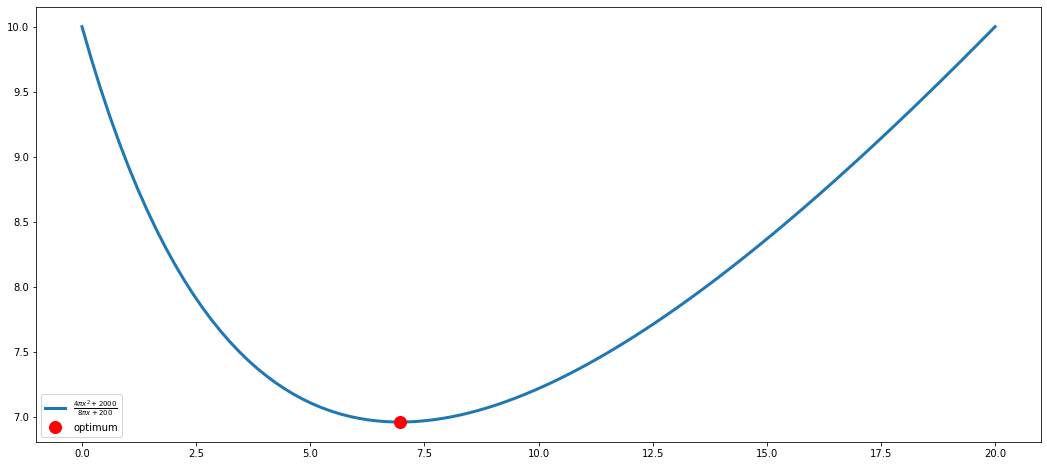

In [ ]:
Plot( h, s, 0, 20 )

# What if we only care about the numerical solution?

## Introducing `pyomo`

This is the moment to meet:
 * mathematical models expressed in `python`, using `pyomo`,
 * powerful numerical optimization algorithms and how to use them. 

We now meet [`pyomo`](http://www.pyomo.org/documentation/) which will keep us company for the rest of the course. 
Note that in particular you may find this [slide-deck](https://software.sandia.gov/downloads/pub/pyomo/Pyomo-Workshop-Summer-2018.pdf) quite useful. 

We will see that `pyomo` completely separates modeling from solving, which allows us to switch solver without recoding! 

## Notebook dependencies requiring installation on `colab`

Note that [this notebook](https://nbviewer.jupyter.org/github/jckantor/ND-Pyomo-Cookbook/blob/master/notebooks/01.02-Running-Pyomo-on-Google-Colab.ipynb) explains how to run `Pyomo` on Google Colab. 
For a complete overview please check the [cookbook](https://jckantor.github.io/ND-Pyomo-Cookbook/).

In [ ]:
import shutil
if not shutil.which('pyomo'):
    !pip install -q pyomo
    assert(shutil.which('pyomo'))

     |████████████████████████████████| 9.2 MB 5.1 MB/s 
     |████████████████████████████████| 49 kB 4.1 MB/s 


In [ ]:
from pyomo.environ import ConcreteModel, Var, Objective, minimize
alice     = ConcreteModel('Alice')
alice.h   = Var( bounds=(0,20) )
alice.cog = Objective(expr =(4*math.pi*alice.h**2+2000)/(8*math.pi*alice.h+200)
                     ,sense=minimize)
alice.pprint()

1 Var Declarations
    h : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :    20 : False :  True :  Reals

1 Objective Declarations
    cog : Size=1, Index=None, Active=True
        Key  : Active : Sense    : Expression
        None :   True : minimize : (12.566370614359172*h**2 + 2000)/(25.132741228718345*h + 200)

2 Declarations: h cog


We may solve the problem even if we have no solver installed!
We simply call a solver on [neos](https://neos-server.org/neos/solvers/index.html) which `pyomo` treats as a _solver manager_.

Note that `neos` requires a valid e-mail address to be specified on the environment variable `NEOS_EMAIL`.

In [ ]:
import os
os.environ['NEOS_EMAIL'] = 'you@your.org'

In [ ]:
from pyomo.environ import SolverManagerFactory
neos = SolverManagerFactory('neos')
%time results = neos.solve( alice, opt='ipopt')
print(results.solver.status, results.solver.termination_condition )
alice.pprint()

CPU times: user 85.7 ms, sys: 19.6 ms, total: 105 ms
Wall time: 13.7 s
ok optimal
1 Var Declarations
    h : Size=1, Index=None
        Key  : Lower : Value            : Upper : Fixed : Stale : Domain
        None :     0 : 6.95803921230998 :    20 : False : False :  Reals

1 Objective Declarations
    cog : Size=1, Index=None, Active=True
        Key  : Active : Sense    : Expression
        None :   True : minimize : (12.566370614359172*h**2 + 2000)/(25.132741228718345*h + 200)

2 Declarations: h cog


Besides `pprint`, `pyomo` objects also implement `display`. 

In [ ]:
alice.display()

Model Alice

  Variables:
    h : Size=1, Index=None
        Key  : Lower : Value            : Upper : Fixed : Stale : Domain
        None :     0 : 6.95803921230998 :    20 : False : False :  Reals

  Objectives:
    cog : Size=1, Index=None, Active=True
        Key  : Active : Value
        None :   True : 6.95803920980307

  Constraints:
    None


The reason why `Alice` reports having no constraints is because we modeled the constraints as `bounds` on the variable. 

We may also examine the parts of the model, as the variables, objectives, etc.

In [ ]:
alice.h.value

6.95803921230998

In [ ]:
alice.cog.expr()

6.95803920980307

It is worth learning more about [magics](https://ipython.readthedocs.io/en/stable/interactive/magics.html), try the magic `%time` above before `solve`.

## What difference does it make if we change solver?

Let us get our own copy of `ipopt`.
We refer again to [this notebook](https://nbviewer.jupyter.org/github/jckantor/ND-Pyomo-Cookbook/blob/master/notebooks/01.02-Running-Pyomo-on-Google-Colab.ipynb) explains how to run `Pyomo` **and how to install solvers** on Google Colab. 
For a complete overview please check the [cookbook](https://jckantor.github.io/ND-Pyomo-Cookbook/).

In [ ]:
import sys
if 'google.colab' in sys.modules:
    !wget -N -q 'https://ampl.com/dl/open/ipopt/ipopt-linux64.zip'
    !unzip -o -q ipopt-linux64

In [ ]:
from pyomo.environ import SolverFactory
%time results = SolverFactory('ipopt').solve(alice)
print(results.solver.status, results.solver.termination_condition )
alice.display()

CPU times: user 4.68 ms, sys: 12.7 ms, total: 17.4 ms
Wall time: 30.7 ms
ok optimal
Model Alice

  Variables:
    h : Size=1, Index=None
        Key  : Lower : Value             : Upper : Fixed : Stale : Domain
        None :     0 : 6.958039212309979 :    20 : False : False :  Reals

  Objectives:
    cog : Size=1, Index=None, Active=True
        Key  : Active : Value
        None :   True : 6.95803920980307

  Constraints:
    None


# Conclusion

This notebook shows you how to solve Alice's problem: finding the most stable amount of water in a vase. 

You learned how to solve the problem analytically with `sympy`, how to use `matplotlib` to visualize the function and the optimum. And how to model Alice's problem on `pyomo` and solve it with `ipopt` both at [neos](https://neos-server.org/neos/solvers/index.html) and "locally" at your own Colab session.


# Last remarks

This notebook deferred installation of the packages needed to the moment that we actually needed them. 

This was deliberate, to show that - for instance - we could solve the problem on `neos` even _before_ having installed our first solver. 

Subsequent notebooks will tend to list all dependencies on their top part, which we often call the _preamble_. 